In [1]:
import matplotlib.pyplot as plt
from countryinfo import CountryInfo
from datetime import datetime
import json
import requests
x_date = datetime.now()

In [2]:
regions = requests.get('https://visitor-counter-adithyarao3103.vercel.app/regions?name=website&password=Adithya@123').json()['regions']

In [3]:
csv = 'Country, Region, City';
for region in regions:
    csv += '\n' + region['country'] + ', ' + region['region'] + ', ' + region['city']
with open('regions.csv', 'w', encoding='utf-8') as f:
    f.write(csv)

In [4]:
with open('countries.json', 'r') as f:
    countries = json.load(f)

In [5]:
with open('regions.csv', 'r', encoding='utf-8') as f:
    data = f.read()
    data = data.split('\n')[1:]
    data = [x.split(',') for x in data]

In [6]:
len(data)

1030

In [7]:
colors = []

country_list = {}
for entry in data:
    country = countries[entry[0]]
    if country in country_list:
        country_list[country] += 1
    else:
        country_list[country] = 1

sorted_countries = dict(sorted(country_list.items(), key=lambda x: x[1]))


In [8]:
continent_colors = {
    'Europe': '#66B2FF',
    'Asia': '#FF9999', 
    'Africa': '#99FF99',
    'North America': '#FFCC99',
    'South America': '#FF99CC',
    'Oceania': '#99FFFF',
    'Antarctica': '#E0E0E0',
}

continent_count = {
    'Europe': 0,
    'Asia': 0, 
    'Africa': 0,
    'North America': 0,
    'South America': 0,
    'Oceania': 0,
    'Antarctica': 0,
}


colors = []

missed = []

for country, count in sorted_countries.items():
    try:
        country_info = CountryInfo(country)
        continent = country_info.region()
        if continent == 'Americas':
            continent = country_info.subregion()
        if continent == 'Central America':
            continent = 'North America'
        if continent == 'Northern America':
            continent = 'North America'
        colors.append(continent_colors[continent])
        continent_count[continent] +=count
    except:
        missed.append(country)

sorted_count = dict(sorted(continent_count.items(), key=lambda x: x[1], reverse=True))

In [9]:
missed

[]

In [10]:
total_visitors = 0
for count in sorted_count.values():
    total_visitors += count

total_countries = len(sorted_countries)

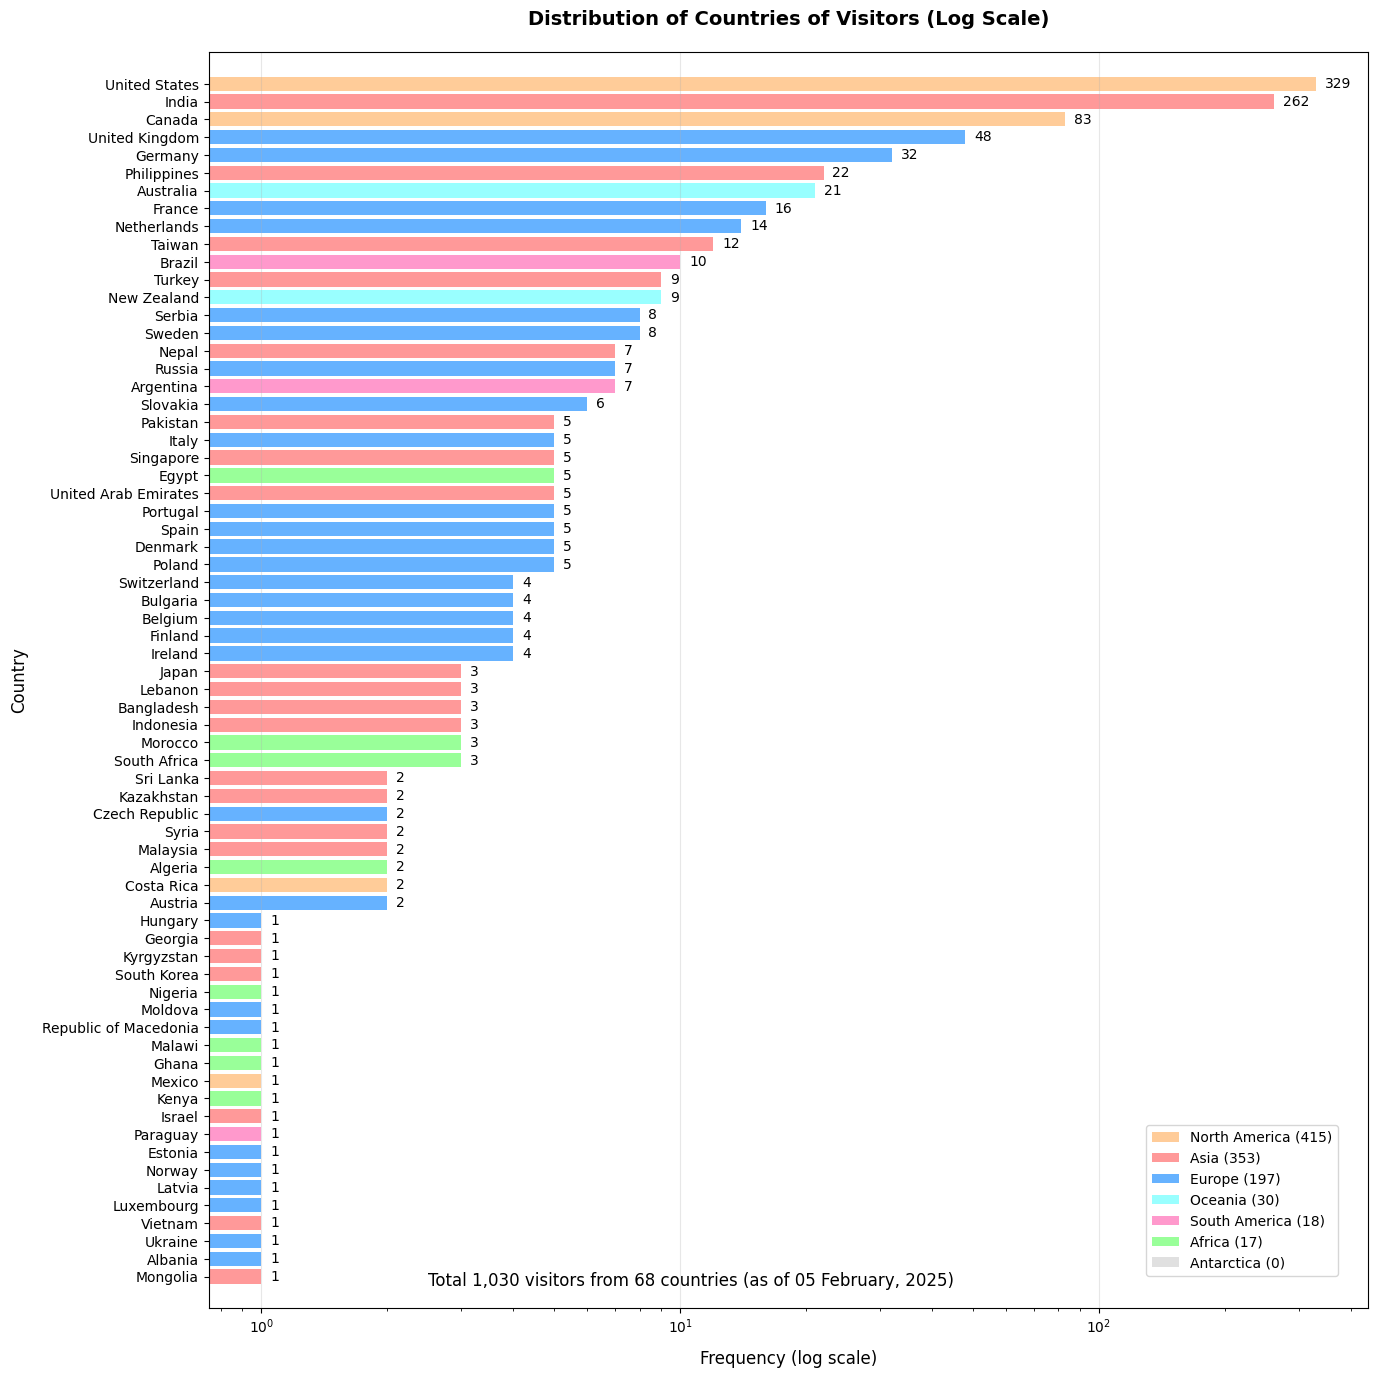

In [11]:
plt.figure(figsize=(14, 14))  

bars = plt.barh(list(sorted_countries.keys()), list(sorted_countries.values()), 
                height=0.8,  
                color=colors)

plt.xscale('log')

for bar in bars:
    width = bar.get_width()
    plt.text(width*1.05, 
            bar.get_y() + bar.get_height()/2,
            f'{int(width):,}', 
            ha='left', 
            va='center',
            fontsize=10)  

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=continent_colors[continent], 
                        label=f'{continent} ({continent_count[continent]:,})')
                for continent in sorted_count.keys()]
plt.legend(handles=legend_elements, 
        loc='lower right', 
        bbox_to_anchor=(0.98, 0.02),
        fontsize=10)

plt.yticks(rotation=0, fontsize=10)
plt.title('Distribution of Countries of Visitors (Log Scale)', 
        pad=20, 
        fontsize=14,
        fontweight='bold')

plt.text(2.5, -0.5,  
        f'Total {total_visitors:,} visitors from {total_countries} countries (as of {x_date.strftime("%d %B, %Y")})', 
        fontsize=12)

plt.xlabel('Frequency (log scale)', fontsize=12, labelpad=10)
plt.ylabel('Country', fontsize=12, labelpad=10)

plt.margins(y=0.02)
plt.tight_layout(pad=1.5) 

plt.grid(True, axis='x', alpha=0.3)  

plt.savefig('country_distribution.png', 
            dpi=150, 
            bbox_inches='tight')
plt.show()
